In [1]:
import json
import numpy as np
import re
from collections import Counter
import matplotlib.pyplot as plt
# import seaborn as sns 
import nltk.data
from nltk.tokenize import word_tokenize,sent_tokenize
from pycorenlp import StanfordCoreNLP
from itertools import groupby

# from nltk.tag.stanford import NERTagger
from nltk.tag import StanfordNERTagger
sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
%matplotlib inline

In [2]:
def read_data(json_file='../data/book_summary2.json'):
    with open(json_file,'r') as f:
        return json.load(f)
    
books = read_data()

In [3]:
character_list = [[ c[0] for c in b['characters']] for b in books]

In [4]:
character_list = [item for sublist in character_list for item in sublist]

In [22]:
import unicodedata

""" Normalise (normalize) unicode data in Python to remove umlauts, accents etc. """
def unicode_normalizer(text):
    text =text.replace(u"\u2019", "'")
    normal = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore')
    return normal

In [29]:
type(unicode_normalizer(u'José Arcadio (II)'))

str

In [9]:
for ch in character_list:
    try:
        str(ch)
    except:
        print(ch)


O’Brien
Ahmed’s Mother
Ahmed’s Father
The Grimes’s Son
The Grimes’s Daughter
The Narrator’s Brother
Nora’s father
Muriel’s Mother
Beneatha Younger (“Bennie”)
Lena Younger (“Mama”)
Kincaid’s Mother
The “Other Prime Minister”
“You”
Harold “Mitch” Mitchell
Marquis Evrémonde
The First Friend (“Plaid”)
The Second Friend (“Big Tall Goony Goony”)
Alice’s sister
Ilse Kleinzähler
Frau Kügler
Paul Bäumer
Müller
Gérard Duval
Farquhar’s Wife
Mr. O’Halloran
O’Brien
Francisco d’Anconia
Grendel’s mother
Ship’s Surgeon
Ship’s Purser
Ship’s Chaplain
Lamott’s Father
Lamott’s Aunt
The Depressed Writer from the Writer’s Group
“Professor” Matthews
Antonio Márez
Gabriel and María Márez
Antonio’s friends: Abel, Bones, Ernie, Horse, Lloyd, Red, and the Vitamin Kid
Andrew, Eugene, and León Márez
Deborah and Theresa Márez
Antonio’s uncles: Juan, Lucas, Mateo, and Pedro Luna
Chávez
Jasón Chávez
Jasón Chávez’s Indian
Téllez
Ultima’s teacher
Popé
Grandmè Ifé
Cunégonde
Brother Giroflée
Don Fernando d’Ibaraa y Figue

In [81]:
def word_count(text):
    return len(re.findall(r'\w+', text))

def character_count(book):
    return len(book['characters'])

def data_summary(books):
    print("There are {} books. ".format(len(books)))
    print("Average length of the summary is . ".format(len(books)))

def choose_k(input_list,k):
    n = len(input_list)
    def choose_range(n, k):
        if k == n:
            return [input_list]
        elif k == 0:
            return [[]]
        elif k == 1:
            return [[(i,input_list[i])] for i in xrange(len(input_list))]
        result = []
        for lst in choose_range(n-1, k-1):
            result.extend(lst + [(i,input_list[i])] for i in range(lst[-1][0] + 1, n))
        return result
    res = choose_range(n,k)
    return [[x[1] for x in items] for items in res]
    

In [12]:
word_count_all = [word_count(books[i]['summary']) for i in xrange(len(books))]
character_count = [character_count(books[i]) for i in xrange(len(books))]


(array([  19.,  116.,  301.,  104.,   26.,    9.,    5.,    1.,    1.,    2.]),
 array([    0. ,   355.2,   710.4,  1065.6,  1420.8,  1776. ,  2131.2,
         2486.4,  2841.6,  3196.8,  3552. ]),
 <a list of 10 Patch objects>)

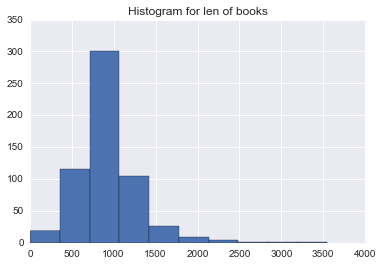

In [13]:
plt.title('Histogram for len of books')
plt.hist(word_count_all)

(array([  71.,  180.,  212.,   69.,   29.,    9.,    7.,    5.,    1.,    1.]),
 array([  0. ,   7.5,  15. ,  22.5,  30. ,  37.5,  45. ,  52.5,  60. ,
         67.5,  75. ]),
 <a list of 10 Patch objects>)

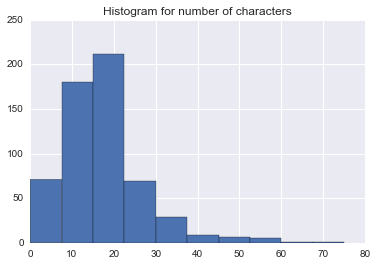

In [14]:
plt.title('Histogram for number of characters')
plt.hist(character_count)

In [15]:
def choose_k(input_list,k):
    n = len(input_list)
    def choose_range(n, k):
        if k == n:
            return [input_list]
        elif k == 0:
            return [[]]
        elif k == 1:
            return [[(i,input_list[i])] for i in xrange(len(input_list))]
        result = []
        for lst in choose_range(n-1, k-1):
            result.extend(lst + [(i,input_list[i])] for i in range(lst[-1][0] + 1, n))
        return result
    res = choose_range(n,k)
    return [[x[1] for x in items] for items in res]

choose_k(['a','b','c','d','e'],3)

[['a', 'b', 'c'],
 ['a', 'b', 'd'],
 ['a', 'b', 'e'],
 ['a', 'c', 'd'],
 ['a', 'c', 'e'],
 ['a', 'd', 'e'],
 ['b', 'c', 'd'],
 ['b', 'c', 'e'],
 ['b', 'd', 'e'],
 ['c', 'd', 'e']]

In [16]:
book = books[0]
pairs = choose_k([ch[0] for ch in book['characters']],2)
text = book['summary']

In [17]:
pairs

[[u'Winston Smith', u'Julia'],
 [u'Winston Smith', u'O\u2019Brien'],
 [u'Winston Smith', u'Big Brother'],
 [u'Winston Smith', u'Mr. Charrington'],
 [u'Winston Smith', u'Syme'],
 [u'Winston Smith', u'Parsons'],
 [u'Winston Smith', u'Emmanuel Goldstein'],
 [u'Julia', u'O\u2019Brien'],
 [u'Julia', u'Big Brother'],
 [u'Julia', u'Mr. Charrington'],
 [u'Julia', u'Syme'],
 [u'Julia', u'Parsons'],
 [u'Julia', u'Emmanuel Goldstein'],
 [u'O\u2019Brien', u'Big Brother'],
 [u'O\u2019Brien', u'Mr. Charrington'],
 [u'O\u2019Brien', u'Syme'],
 [u'O\u2019Brien', u'Parsons'],
 [u'O\u2019Brien', u'Emmanuel Goldstein'],
 [u'Big Brother', u'Mr. Charrington'],
 [u'Big Brother', u'Syme'],
 [u'Big Brother', u'Parsons'],
 [u'Big Brother', u'Emmanuel Goldstein'],
 [u'Mr. Charrington', u'Syme'],
 [u'Mr. Charrington', u'Parsons'],
 [u'Mr. Charrington', u'Emmanuel Goldstein'],
 [u'Syme', u'Parsons'],
 [u'Syme', u'Emmanuel Goldstein'],
 [u'Parsons', u'Emmanuel Goldstein']]

In [1]:
from nltk.tag import StanfordNERTagger

# st = StanfordNERTagger('/Users/codehi/tools/StanfordParser/stanford-ner-2016-10-31/classifiers/english.all.3class.distsim.crf.ser.gz',
#                '/Users/codehi/tools/StanfordParser/stanford-ner-2016-10-31/stanford-ner.jar') 

st = StanfordNERTagger('english.all.3class.distsim.crf.ser.gz')#
#r'/Users/codehi/Projects/Galvanize/Capstone/tools/stanford-english-corenlp-2016-10-31-models.jar') 
# st = POSTagger(r'english-bidirectional-distim.tagger',r'/Users/codehi/Projects/Galvanize/Capstone/tools/stanford-english-corenlp-2016-10-31-models.jar')


In [33]:
netagged_words

[(u'Rami', u'PERSON'),
 (u'Eid', u'PERSON'),
 (u'is', u'O'),
 (u'studying', u'O'),
 (u'at', u'O'),
 (u'Stony', u'ORGANIZATION'),
 (u'Brook', u'ORGANIZATION'),
 (u'University', u'ORGANIZATION'),
 (u'in', u'O'),
 (u'New', u'LOCATION'),
 (u'York', u'LOCATION')]

In [37]:
import spacy
nlp = spacy.load('en')
doc = nlp(u'They told us to duck.')
for word in doc:
    print(word.text, word.lemma, word.lemma_, word.tag, word.tag_, word.pos, word.pos_)

(u'They', 500, u'they', 445, u'PRP', 92, u'PRON')
(u'told', 750, u'tell', 455, u'VBD', 97, u'VERB')
(u'us', 694, u'us', 445, u'PRP', 92, u'PRON')
(u'to', 468, u'to', 452, u'TO', 91, u'PART')
(u'duck', 5792, u'duck', 454, u'VB', 97, u'VERB')
(u'.', 419, u'.', 419, u'.', 94, u'PUNCT')


In [56]:
doc = nlp(u'Rami Eid is studying at Stony Brook University in New York.')
for ent in doc.ents:
    print(ent.label_, ent.text)

(u'PERSON', u'Rami Eid')
(u'ORG', u'Stony Brook University')
(u'GPE', u'New York')


In [59]:
for word in doc:
    print(word.text,  word.lemma_, word.tag_, word.pos_)

(u'Rami', u'rami', u'NNP', u'PROPN')
(u'Eid', u'eid', u'NNP', u'PROPN')
(u'is', u'be', u'VBZ', u'VERB')
(u'studying', u'study', u'VBG', u'VERB')
(u'at', u'at', u'IN', u'ADP')
(u'Stony', u'stony', u'NNP', u'PROPN')
(u'Brook', u'brook', u'NNP', u'PROPN')
(u'University', u'university', u'NNP', u'PROPN')
(u'in', u'in', u'IN', u'ADP')
(u'New', u'new', u'NNP', u'PROPN')
(u'York', u'york', u'NNP', u'PROPN')
(u'.', u'.', u'.', u'PUNCT')


In [54]:
s1['id']

0

In [37]:
# for sent in sent_tokenize(text):
#     doc = nlp(sent)
#     for ent in doc.ents:
#         if ent.label_ == 'PERSON':
#             print(ent.text)
#     print 

In [2]:
import re

In [66]:
# search_go_to = set(["go", "to"])
# m = ' .*? '.join(x for x in search_go_to)
# words = set(["I go over to", "go up to", "foo bar"])
# matches = [s for s in words if re.search(m, s)]
# print(matches)


In [ ]:
from corenlp_xml_reader import AnnotatedText as A
from lxml import html
from collections import defaultdict
import networkx as nx
import nxpd
import numpy as np

In [105]:
def sentence_out(sent):
    return ' '.join([w['word'] for w in sent['tokens']])


def co_occurence(doc):
    pair_sent = defaultdict(list)
    for sentence in doc.sentences:

        curr_name = []
        prev_ner = None
        for ent in sentence['tokens']:
            if ent['ner'] == 'PERSON':
                name = ent['word']
                size = len(name)
                if not prev_ner or prev_ner == name:
                    prev_ner = name
                else:
                    prev_ner += ' ' + name
            else:
                if prev_ner:
                    curr_name.append(prev_ner)
                prev_ner = None
        if prev_ner:
            curr_name.append(prev_ner)
            
        if curr_name:
            pair = []
            prev = None
            for name_ in curr_name:
                if (not prev or prev!=name_) and len(pair)<2:
                    pair.append(name_)
                    prev = name_
            pair = tuple(sorted(pair))
            
        if len(pair)==2:
            pair_sent[pair].append((sentence_out(sentence),sentiment[sentence['id']]))
    return pair_sent

def xml_analysis(xml_file,limit = 1):
    translate = {'Verynegative':-2, 'Negative':-1,'Positive':1,'Verypostive':2,'Neutral':0}
    xml = open(xml_file).read()
    annotated_text = A(xml)
    
    tree = html.fromstring(xml)
    sentiment = tree.xpath('//sentence/@sentiment')
    sentiment = [translate[key] for key in sentiment]

    pair_dict =co_occurence(annotated_text)
    
    avg_sent = lambda x:np.mean([y[1] for y in x])

    G = nx.Graph()
    for key,value in pair_dict.iteritems():
        appear = len(value)
        if appear>limit:
            G.add_edge(key[0],key[1], label='Connect:{},Sentiment:{}'.format(appear,avg_sent(value) ))
    
#     nxpd.draw(G, show='ipynb')
    
    return G

2017-03-23 13:20:20.600 dot[1337:31914428] XType: failed to connect - Error Domain=NSCocoaErrorDomain Code=4099 "The connection to service named com.apple.fonts was invalidated." UserInfo={NSDebugDescription=The connection to service named com.apple.fonts was invalidated.}
2017-03-23 13:20:20.600 dot[1337:31914428] Font server protocol version mismatch (expected:5 got:0), falling back to local fonts
2017-03-23 13:20:20.601 dot[1337:31914428] XType: unable to make a connection to the font daemon!
2017-03-23 13:20:20.601 dot[1337:31914428] registering /System/Library/Fonts/*, /System/Library/Fonts/Base/*, and /Library/Fonts/* locally



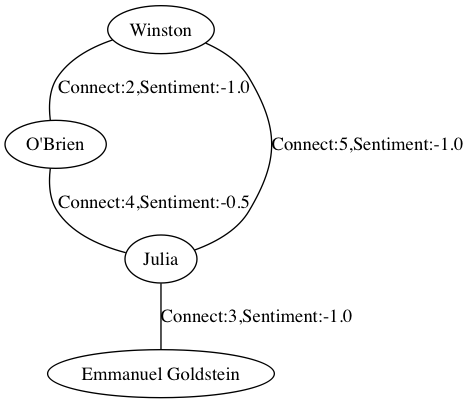

In [106]:
G = xml_analysis('../data/summary-tag/1.1984_tag.txt.xml')
nxpd.draw(G, show='ipynb')


In [ ]:
G = xml_analysis('../data/summary-tag/1.1984_full_tag.txt.xml',5)
nxpd.draw(G, show='ipynb')
